# Regression problem on diabetes dataset from sklearn

In [1]:
# Load the modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset in an object and check the data
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
# Find the dependent, independent features, and also the column names
data.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [4]:
data.target[0]

151.0

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
print(data.DESCR, end='\n')

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [7]:
# Create the complete dataframe
# First read the independent features
df = pd.DataFrame(data.data, columns=[data.feature_names])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [9]:
# Check the column names
df.columns

MultiIndex([(   'age',),
            (   'sex',),
            (   'bmi',),
            (    'bp',),
            (    's1',),
            (    's2',),
            (    's3',),
            (    's4',),
            (    's5',),
            (    's6',),
            ('target',)],
           )

In [10]:
# The column names are tuples for some weird reason, let's fix them
df.columns = [t[0] for t in df.columns]
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Shape of your Data Set loaded: (442, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 55
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


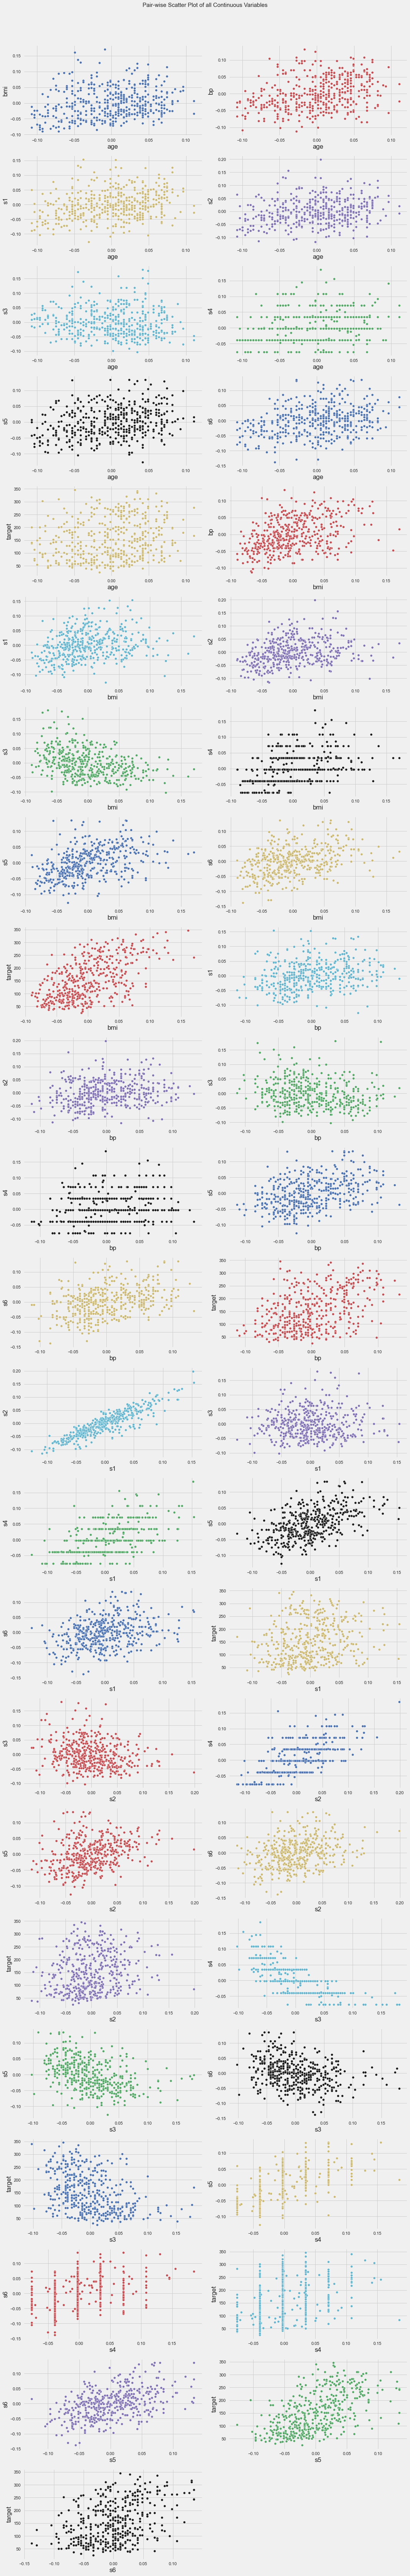

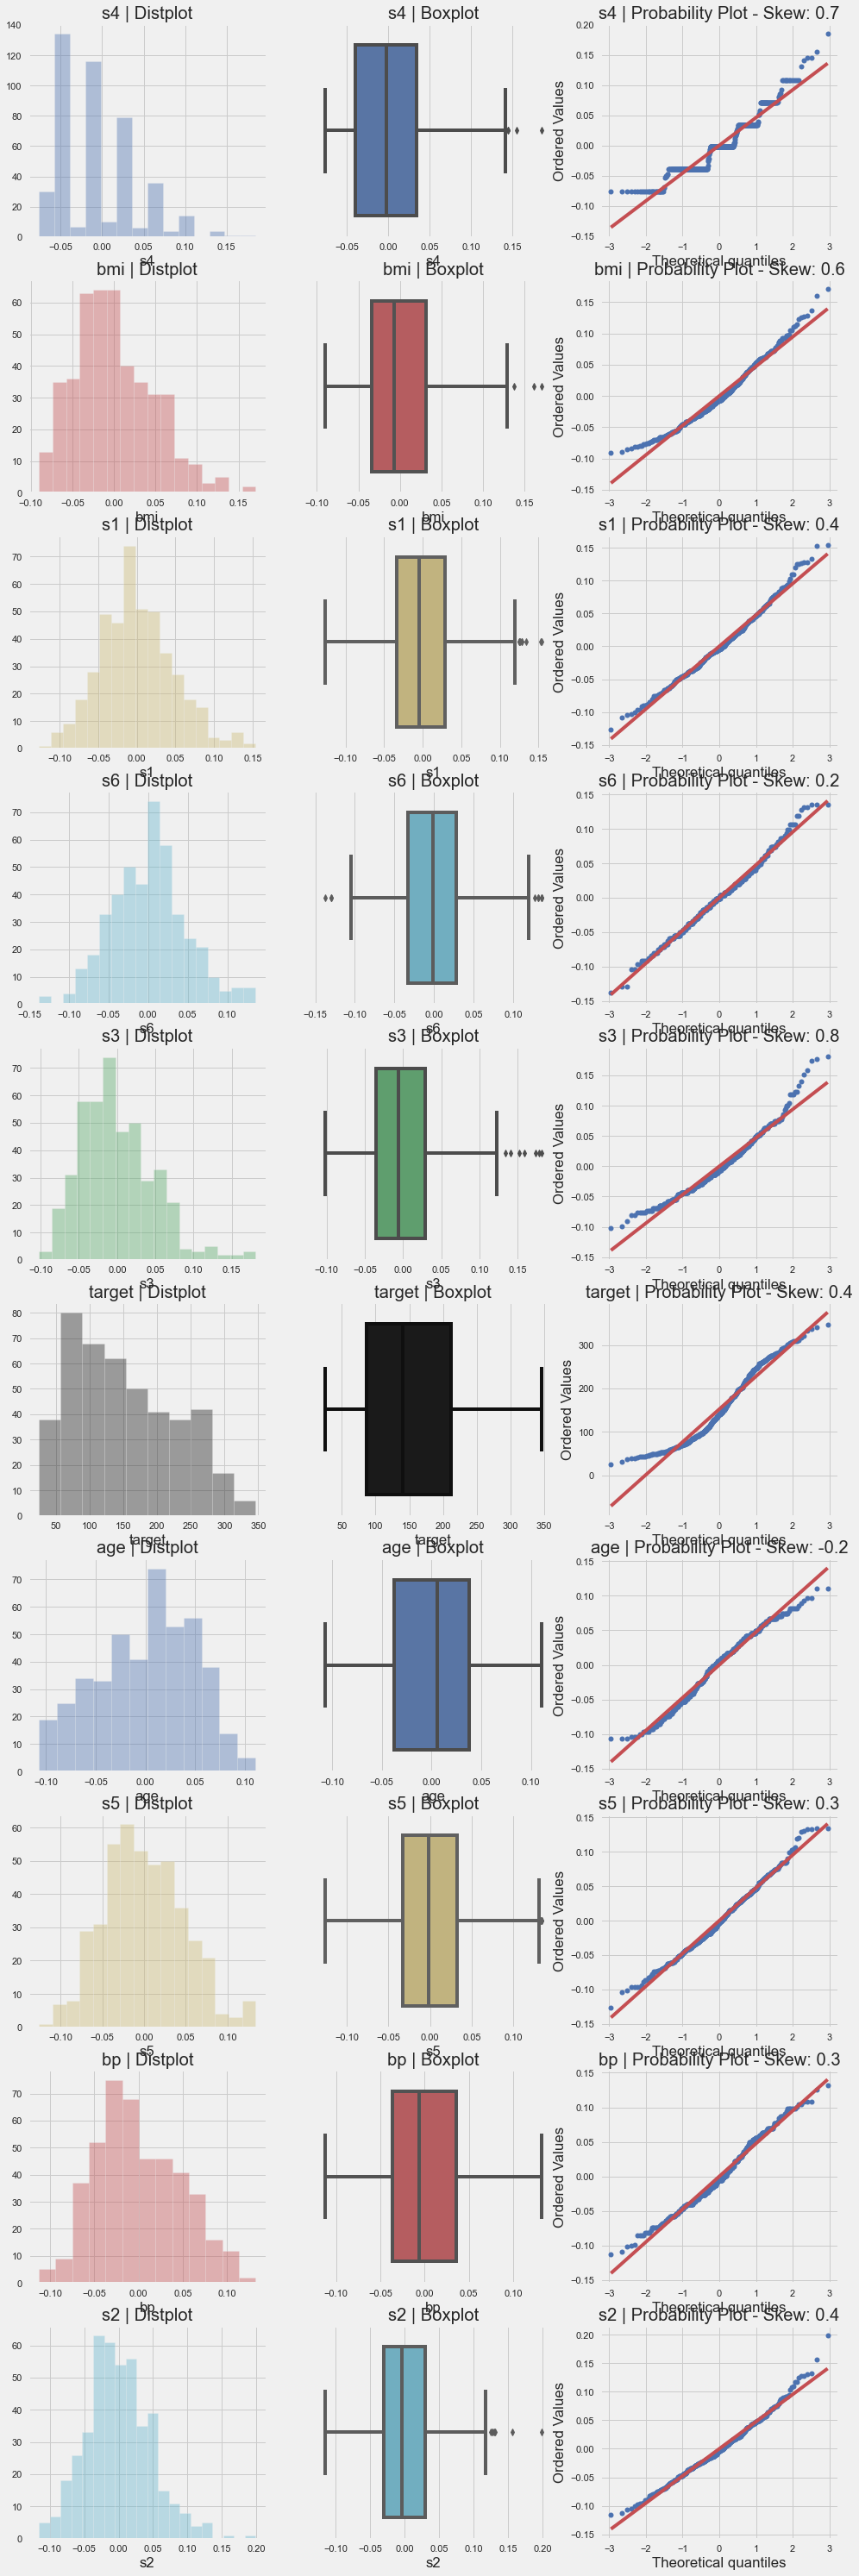

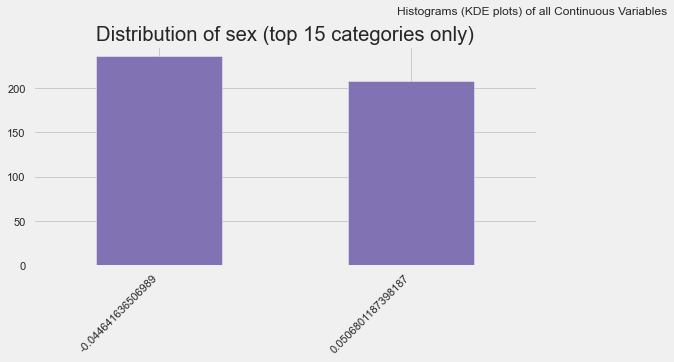

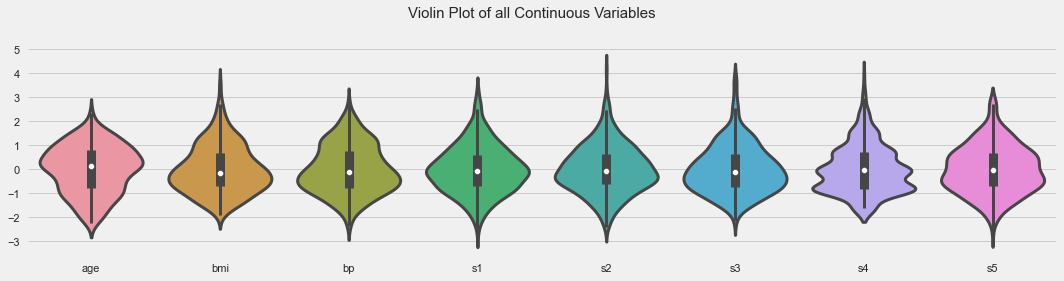

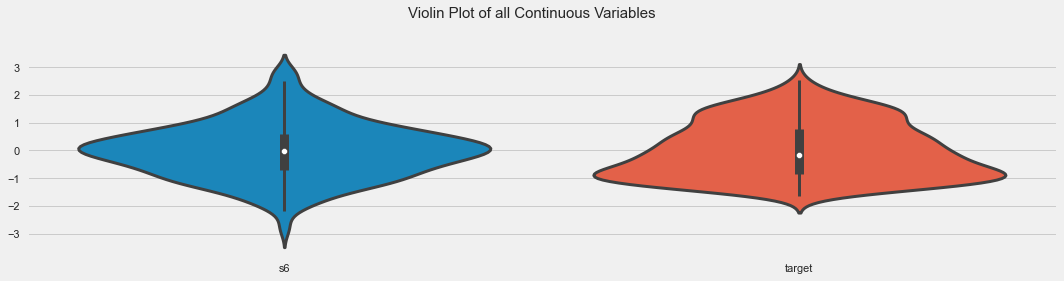

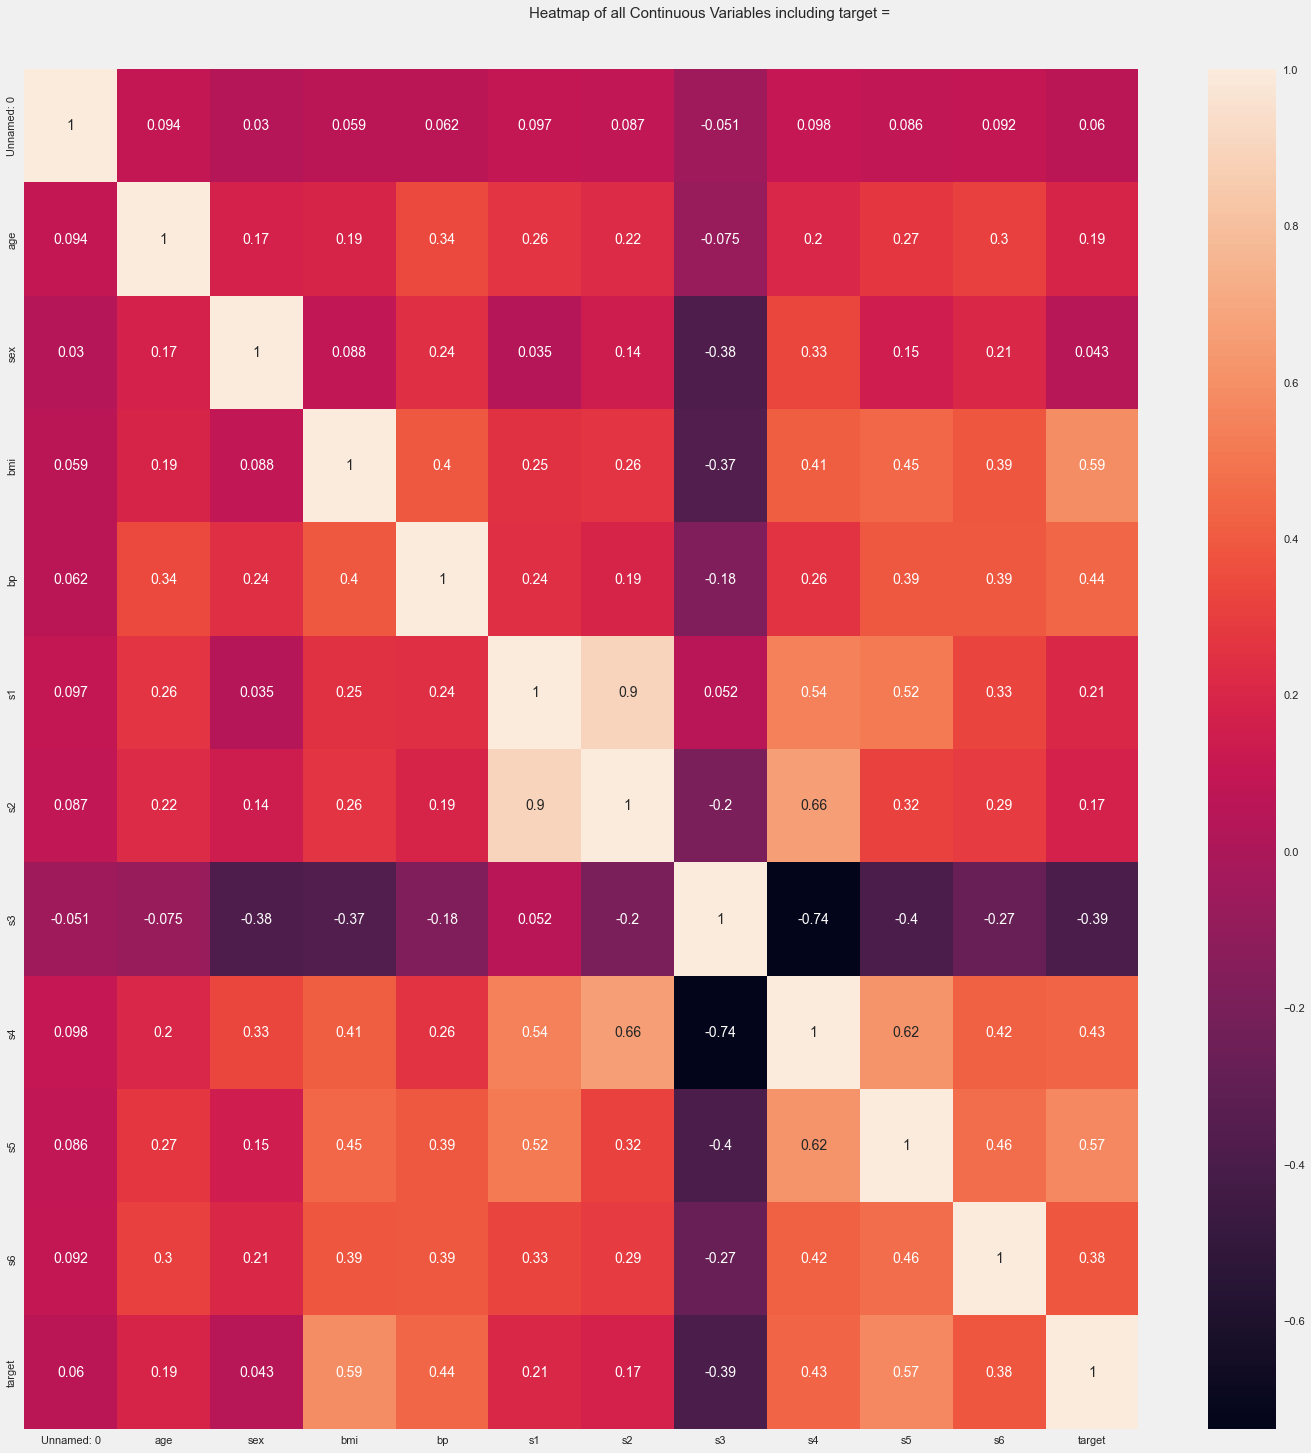

In [15]:
# Let's use the autoviz module for preliminary analysis
from autoviz.AutoViz_Class import AutoViz_Class
df.to_csv('temp.csv')
filename = 'temp.csv'
AV = AutoViz_Class()
dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)

In [13]:
# We observe above that most of the numerical features are already standardized and encoded
# So we will begin the regression process

In [14]:
df.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [15]:
# Split the data into dependent and independent
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
X.iloc[0], y.iloc[0]

(age    0.038076
 sex    0.050680
 bmi    0.061696
 bp     0.021872
 s1    -0.044223
 s2    -0.034821
 s3    -0.043401
 s4    -0.002592
 s5     0.019908
 s6    -0.017646
 Name: 0, dtype: float64,
 151.0)

In [16]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Select the Linear Regression model to get the default scores
from sklearn.linear_model import LinearRegression

In [18]:
# Instantiate the model
model = LinearRegression()

In [19]:
# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [21]:
# Predict the outcome of test data
preds = model.predict(X_test)

In [22]:
# Check the performance metrics for linear regression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
mae(preds, y_test), mse(preds, y_test), r2(preds, y_test)

(42.793893041965255, 2900.1732878832318, 0.006913294970993911)

In [23]:
# Compare sample results with the test labels
y_test[:5], preds[:5]

(287    219.0
 211     70.0
 72     202.0
 321    230.0
 73     111.0
 Name: target, dtype: float64,
 array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
        123.78723656]))

## We see that the simple linear regression model has an mae of 42.8 and r2 close to 0

# Now we will use all models in turn for comparison

In [24]:
# Build all regression models for comparison

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
import numpy as np
import datetime as dt

In [25]:
# Define the models for regression

models = {
'LIN': LinearRegression(),
'RID': Ridge(),
'LAS': Lasso(),
'RFR': RandomForestRegressor(),
'ADA': AdaBoostRegressor(),
'DCT': DecisionTreeRegressor(),
'XGB': XGBRegressor()
}

In [26]:
# Evaluate each model in turn using cross validation score on the training data

results = []
names = []
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {-1*(cv_results.mean()):.1f}   {cv_results.std():.1f}")

LIN: 45.0   1.8
RID: 50.7   4.4
LAS: 53.7   4.5
RFR: 48.8   3.2
ADA: 49.0   4.0
DCT: 62.5   9.4
XGB: 51.2   2.3


## Surprisingly the simplest Linear Regression model has performed the best with mae 45 and std 1.8

# Now let's use all models with parameters using Grid search

In [27]:
# Declare the hyper parameters to iterate upon

params = {
'RID' : { 'alpha' : [1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 50, 55, 100, 200, 300]},
'LAS': { 'alpha' : [0.02, 0.025, 0.03, 0.035, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3, 0.5, 0.8, 1, 2, 5, 10, 20]},
'RFR': { 'n_estimators' : [50, 200, 400], 'max_depth': [3, 5, 7]},
'ADA': { 'n_estimators': [50, 100], 'learning_rate': [1.0, 2.0]},
'DCT': { 'max_leaf_nodes' : [100, 200, 300, 400]},
'XGB': {"learning_rate"    : [0.10, 0.3] ,
         "max_depth"        : [ 3, 5],
         "min_child_weight" : [ 1, 3],
         "gamma"            : [ 0.0, 1]
}}

In [28]:
# Define the Grid Search function

def grid(models, params, X_train, y_train):
    grid_Model = {}
    # Grid Search operation on every model
    for i in models:
        if i=='LIN':
            grid_Model[i] = models[i]
        else:
            t1=dt.datetime.now()
            print(f"Starting Grid Search of model: {i} parameters")
            grid_Model[i] = GridSearchCV(models[i], param_grid=params[i], 
                            scoring='neg_mean_absolute_error', 
                            cv=5, verbose=1).fit(X_train, y_train).best_estimator_
            t2=dt.datetime.now()
            print(f"Completed Grid Search of model: {i} parameters in time: {t2-t1}")
            
    return grid_Model

In [29]:
# Run the Grid Search function using selected hyper parameters

t3=dt.datetime.now()
print("Starting the Grid Search process")
best_Models = grid(models, params, X_train, y_train)
t4=dt.datetime.now()
print(f"Grid search for all models is complete in total time: {t4-t3}")

Starting the Grid Search process
Starting Grid Search of model: RID parameters
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Completed Grid Search of model: RID parameters in time: 0:00:00.620264
Starting Grid Search of model: LAS parameters
Fitting 5 folds for each of 17 candidates, totalling 85 fits
Completed Grid Search of model: LAS parameters in time: 0:00:00.709649
Starting Grid Search of model: RFR parameters
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Completed Grid Search of model: RFR parameters in time: 0:00:29.587104
Starting Grid Search of model: ADA parameters
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Completed Grid Search of model: ADA parameters in time: 0:00:03.899758
Starting Grid Search of model: DCT parameters
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Completed Grid Search of model: DCT parameters in time: 0:00:00.241939
Starting Grid Search of model: XGB parameters
Fitting 5 folds for each of 16 can

In [30]:
# Function to conduct the training, prediction, and scoring using the best hyper parameters

def test(models, X_train, X_test, y_train, y_test, iterations = 1):
    results = {}
    for i in models:
        print(f"Starting model {i}")
        t1 = dt.datetime.now()
        r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = [], [], [], [], [], []
        for j in range(iterations):
            print(f"Starting iteration {j+1} of model {i} with Params: {models[i].get_params()}")
            preds_train = models[i].fit(X_train, y_train).predict(X_train)
            preds_test = models[i].fit(X_train, y_train).predict(X_test)
            r2_train.append(r2(y_train, preds_train))
            r2_test.append(r2(y_test, preds_test))
            mae_train.append(mae(y_train, preds_train))
            mae_test.append(mae(y_test, preds_test))
            mse_train.append(mse(y_train, preds_train))
            mse_test.append(mse(y_test, preds_test))
            print(f"Completed iteration {j+1} of model {i}")
            
        results[i] = [np.mean(r2_train), np.mean(mae_train), np.mean(mse_train), 
                      np.mean(r2_test), np.mean(mae_test), np.mean(mse_test)]
        t2 = dt.datetime.now()
        print(f"Completed scoring model: {i} in time: {t2-t1}", '\n')
        
    index = ['r2_train', 'mae_train', 'mse_train', 'r2_test', 'mae_test', 'mse_test']
    return pd.DataFrame(results, index=index)

In [31]:
# Run the tests
t3=dt.datetime.now()
print("Starting the training, prediction and scoring process", '\n')
result = test(best_Models, X_train, X_test, y_train, y_test)
t4=dt.datetime.now()
print(f"Training, prediction and scoring for all models is complete in total time: {t4-t3}")

Starting the training, prediction and scoring process 

Starting model LIN
Starting iteration 1 of model LIN with Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Completed iteration 1 of model LIN
Completed scoring model: LIN in time: 0:00:00.022926 

Starting model RID
Starting iteration 1 of model RID with Params: {'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Completed iteration 1 of model RID
Completed scoring model: RID in time: 0:00:00.026932 

Starting model LAS
Starting iteration 1 of model LAS with Params: {'alpha': 0.02, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Completed iteration 1 of model LAS
Completed scoring model: LAS in tim

In [32]:
# Print the results

result

,LIN,RID,LAS,RFR,ADA,DCT,XGB
r2_train,0.527920,0.526180,0.524674,0.847388,0.663348,0.996416,0.822806
mae_train,43.483549,43.567887,43.650611,25.290176,39.977370,3.221624,26.015319
mse_train,2868.546584,2879.121404,2888.270940,927.330176,2045.631712,21.778187,1076.701888
r2_test,0.452607,0.455984,0.459533,0.454493,0.439392,0.138196,0.422708
mae_test,42.793893,42.836839,42.844754,43.751337,44.862220,51.574719,45.014307
mse_test,2900.173288,2882.278969,2863.476517,2890.181247,2970.185215,4565.970977,3058.581783


## Yet again, simple Linear Regression performed best

## Now we will compare the input hyper parameters with the best hyper params, tune the input params again, and check the predictions

In [33]:
# Declare the hyper parameters to iterate upon

params = {
'RID' : { 'alpha' : [0.01, 0.04, 0.07, 0.1, 0.2, 0.3]},
'LAS': { 'alpha' : [0.005, 0.01, 0.015, 0.02, 0.025]},
'RFR': { 'n_estimators' : [25, 50, 75], 'max_depth': [6, 7, 9]},
'ADA': { 'n_estimators': [25, 50, 75], 'learning_rate': [0.5, 1.0, 1.5]},
'DCT': { 'max_leaf_nodes' : [75, 100, 125]},
'XGB': {"learning_rate"    : [0.05, 0.10, 0.15] ,
         "max_depth"        : [2, 3, 4],
         "min_child_weight" : [ 1, 2],
         "gamma"            : [ 0.0, 0.1]
}}

In [34]:
# Run the Grid Search function using selected hyper parameters

t3=dt.datetime.now()
print("Starting the Grid Search process")
best_Models = grid(models, params, X_train, y_train)
t4=dt.datetime.now()
print(f"Grid search for all models is complete in total time: {t4-t3}")

Starting the Grid Search process
Starting Grid Search of model: RID parameters
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Completed Grid Search of model: RID parameters in time: 0:00:00.368525
Starting Grid Search of model: LAS parameters
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Completed Grid Search of model: LAS parameters in time: 0:00:00.390446
Starting Grid Search of model: RFR parameters
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Completed Grid Search of model: RFR parameters in time: 0:00:10.042128
Starting Grid Search of model: ADA parameters
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Completed Grid Search of model: ADA parameters in time: 0:00:09.027878
Starting Grid Search of model: DCT parameters
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Completed Grid Search of model: DCT parameters in time: 0:00:00.181232
Starting Grid Search of model: XGB parameters
Fitting 5 folds for each of 36 candi

In [35]:
# Run the tests
t3=dt.datetime.now()
print("Starting the training, prediction and scoring process", '\n')
result = test(best_Models, X_train, X_test, y_train, y_test)
t4=dt.datetime.now()
print(f"Training, prediction and scoring for all models is complete in total time: {t4-t3}")

Starting the training, prediction and scoring process 

Starting model LIN
Starting iteration 1 of model LIN with Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Completed iteration 1 of model LIN
Completed scoring model: LIN in time: 0:00:00.060136 

Starting model RID
Starting iteration 1 of model RID with Params: {'alpha': 0.04, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Completed iteration 1 of model RID
Completed scoring model: RID in time: 0:00:00.027894 

Starting model LAS
Starting iteration 1 of model LAS with Params: {'alpha': 0.02, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Completed iteration 1 of model LAS
Completed scoring model: LAS in tim

In [36]:
# Print the results

result

,LIN,RID,LAS,RFR,ADA,DCT,XGB
r2_train,0.527920,0.523725,0.524674,0.796269,0.619935,0.902755,0.643149
mae_train,43.483549,43.694377,43.650611,29.227990,41.261731,18.947097,38.279945
mse_train,2868.546584,2894.038645,2888.270940,1237.953249,2309.426526,590.898258,2168.371536
r2_test,0.452607,0.458434,0.459533,0.450647,0.470635,0.279072,0.490589
mae_test,42.793893,42.872731,42.844754,43.950650,43.285903,49.002386,42.321387
mse_test,2900.173288,2869.300141,2863.476517,2910.555545,2804.653658,3819.587496,2698.936531


## As we clearly see, and also as expected, XG Boost model has performed best with mae 42.3 and Simple Linear model is very close runners up

## Now we will again compare the input hyper parameters with the best hyper params, tune the input params again, and check the predictions

In [37]:
# Declare the hyper parameters to iterate upon

params = {
'RID' : { 'alpha' : [0.035, 0.038, 0.04, 0.042, 0.045]},
'LAS': { 'alpha' : [0.019, 0.020, 0.021]},
'RFR': { 'n_estimators' : [53, 55, 57], 'max_depth': [6]},
'ADA': { 'n_estimators': [22, 25, 28], 'learning_rate': [0.7, 0.8, 0.85]},
'DCT': { 'max_leaf_nodes' : [106, 110, 116]},
'XGB': {"learning_rate"    : [0.06, 0.07, 0.08] ,
         "max_depth"        : [1],
         "min_child_weight" : [1],
         "gamma"            : [0.0, 0.01]
}}

In [38]:
# Run the Grid Search function using selected hyper parameters

t3=dt.datetime.now()
print("Starting the Grid Search process")
best_Models = grid(models, params, X_train, y_train)
t4=dt.datetime.now()
print(f"Grid search for all models is complete in total time: {t4-t3}")

Starting the Grid Search process
Starting Grid Search of model: RID parameters
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Completed Grid Search of model: RID parameters in time: 0:00:00.342095
Starting Grid Search of model: LAS parameters
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Completed Grid Search of model: LAS parameters in time: 0:00:00.154144
Starting Grid Search of model: RFR parameters
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Completed Grid Search of model: RFR parameters in time: 0:00:03.687840
Starting Grid Search of model: ADA parameters
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Completed Grid Search of model: ADA parameters in time: 0:00:04.643523
Starting Grid Search of model: DCT parameters
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Completed Grid Search of model: DCT parameters in time: 0:00:00.199582
Starting Grid Search of model: XGB parameters
Fitting 5 folds for each of 6 candid

In [39]:
# Run the tests
t3=dt.datetime.now()
print("Starting the training, prediction and scoring process", '\n')
result = test(best_Models, X_train, X_test, y_train, y_test)
t4=dt.datetime.now()
print(f"Training, prediction and scoring for all models is complete in total time: {t4-t3}")

Starting the training, prediction and scoring process 

Starting model LIN
Starting iteration 1 of model LIN with Params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Completed iteration 1 of model LIN
Completed scoring model: LIN in time: 0:00:00.062097 

Starting model RID
Starting iteration 1 of model RID with Params: {'alpha': 0.04, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Completed iteration 1 of model RID
Completed scoring model: RID in time: 0:00:00.025831 

Starting model LAS
Starting iteration 1 of model LAS with Params: {'alpha': 0.021, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Completed iteration 1 of model LAS
Completed scoring model: LAS in ti

In [40]:
# Print the results

result

,LIN,RID,LAS,RFR,ADA,DCT,XGB
r2_train,0.527920,0.523725,0.524628,0.795894,0.611586,0.964038,0.571956
mae_train,43.483549,43.694377,43.656347,29.137974,41.751232,11.233723,42.271002
mse_train,2868.546584,2894.038645,2888.551370,1240.231883,2360.160196,218.521596,2600.968219
r2_test,0.452607,0.458434,0.459845,0.470862,0.490681,0.096470,0.481758
mae_test,42.793893,42.872731,42.843198,42.769220,42.640755,54.049407,41.924059
mse_test,2900.173288,2869.300141,2861.823186,2803.454295,2698.449235,4787.039227,2745.723360


## Finally, XG Boost model has performed best after hyperparameter tuning with mae 41.9 and AdaBoost and RandomForest are very close runners up. Also, Simple Linear model is a very close runners up.